# Study of key factors that influence US home prices nationally.

### Preparation

**Assignment**: Find publicly available data for key factors that influence US home prices nationally. Then, build a data science model that explains how these factors impacted home prices over the last 20 years. Use the S&P Case-Schiller Home Price Index as a proxy for home prices: fred.stlouisfed.org/series/CSUSHPISA.

**Let's Start Preparation**
1. **Data Collection**
The following variables are chosen for the study-
  # Data download from: https://fred.stlouisfed.org/
- Unemployment Rate
- Median Household Income
- Interest Rates
- Number of new houses supplied
- Housing subsidies
  # Data Download from : https://fred.stlouisfed.org/
- Percentage of population above 65



### Data Processing

***Reading CASE-SHILLER Index into a dataframe***

In [1]:
import numpy as np
import pandas as pd

In [62]:
#Target Data
df_CSUSHPISA = pd.read_csv("C:\\Users\\amitc\\Downloads\\New folder\\data files\\CSUSHPISA.csv", encoding='utf-8')

In [63]:
#Changing dtype of date column
df_CSUSHPISA["DATE"] = pd.to_datetime(df_CSUSHPISA["DATE"])

#Selecting data from JAN 2003
mask = df_CSUSHPISA["DATE"] >= "2003-01-01"
df_CSUSHPISA = df_CSUSHPISA[mask]

C:\Users\amitc\AppData\Local\Temp\ipykernel_15368\1663538186.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_CSUSHPISA["DATE"] = pd.to_datetime(df_CSUSHPISA["DATE"])


In [64]:
#Resetting Index
df_CSUSHPISA.reset_index(inplace = True)
df_CSUSHPISA.drop(columns = ["index"], inplace = True)

In [89]:
print(df_CSUSHPISA.shape)
df_CSUSHPISA.tail()

(249, 2)


,DATE,CSUSHPISA
244,2023-01-05,302.566
245,2023-01-06,304.593
246,2023-01-07,306.767
247,2023-01-08,309.155
248,2023-01-09,311.175


### Unemployment Rate

In [68]:
# Reading Unemployment Rate Data into a dataframe
df_unempR = pd.read_csv("C:\\Users\\amitc\\Downloads\\New folder\\data files\\UNRATE.csv", encoding='utf-8')


In [88]:
print(df_unempR.shape)
df_unempR.tail()

(909, 2)


,DATE,UNRATE
906,2023-07-01,3.5
907,2023-08-01,3.8
908,2023-09-01,3.8
909,2023-10-01,3.9
910,2023-11-01,3.7


### Interest Rate Data

In [87]:
# Reading intrest rate Data into a dataframe
df_Fed_rate = pd.read_csv("C:\\Users\\amitc\\Downloads\\New folder\\data files\\FEDFUNDS.csv", encoding='utf-8')
print(df_Fed_rate.shape)
df_Fed_rate.tail()

(833, 2)


,DATE,FEDFUNDS
828,2023-07-01,5.12
829,2023-08-01,5.33
830,2023-09-01,5.33
831,2023-10-01,5.33
832,2023-11-01,5.33


### Housing Subsidies

In [86]:
# Reading housing subsidies Data into a dataframe

df_subsidy = pd.read_csv("C:\\Users\\amitc\\Downloads\\New folder\\data files\\HOUSSUB.csv", names = ["DATE", "Subsidy"], skiprows = 1)
print(df_subsidy.shape)
df_subsidy.tail()

(63, 2)


,DATE,Subsidy
58,2018-01-01,38.859
59,2019-01-01,40.185
60,2020-01-01,44.147
61,2021-01-01,45.299
62,2022-01-01,48.021


### Median Household Income

In [85]:
# Reading Median Household Income Data into a dataframe

df_income = pd.read_csv("C:\\Users\\amitc\\Downloads\\New folder\\data files\\houseincome.csv", names = ["DATE", "Income"], skiprows = 1)
print(df_income.shape)
df_income.tail()

(922, 2)


,DATE,Income
917,2023-06-01,337.336
918,2023-07-01,334.576
919,2023-08-01,333.980
920,2023-09-01,332.224
921,2023-10-01,329.690


### Number of new houses supplied

In [90]:
# Monthly new house supply data into dataframe
df_house = pd.read_csv("C:\\Users\\amitc\\Downloads\\New folder\\data files\\COMPUTSA.csv", names = ["DATE", "Houses"], skiprows = 1)
print(df_house.shape)
df_house.tail()

(670, 2)


,DATE,Houses
665,2023-06-01,1492.0
666,2023-07-01,1334.0
667,2023-08-01,1370.0
668,2023-09-01,1478.0
669,2023-10-01,1410.0


In [91]:
# Reading Per Capita GDP Data into a dataframe
df_pcgdp = pd.read_csv("C:\\Users\\amitc\\Downloads\\New folder\\data files\\GDP.csv", names = ["DATE", "Per_Capita_GDP"], skiprows = 1)
print(df_pcgdp.shape)
df_pcgdp.tail()

(307, 2)


,DATE,Per_Capita_GDP
302,01-07-22,65462
303,01-10-22,65783
304,01-01-23,66078
305,01-04-23,66341
306,01-07-23,67083


***Merging data frame***

In [101]:
# Merging Per Capita GDP (Quarterly data)
df_pcgdp["DATE"] = pd.to_datetime(df_pcgdp["DATE"])
df_CSUSHPISA = pd.merge(df_CSUSHPISA,df_pcgdp, how = "left")
df_CSUSHPISA.head()

,DATE,CSUSHPISA,Per_Capita_GDP
0,2003-01-01,128.461,50462.0
1,2003-01-02,129.355,NaN
2,2003-01-03,130.148,NaN
3,2003-01-04,130.884,50796.0
4,2003-01-05,131.735,NaN


In [107]:
# Concating dataframes having monthly data to create one dataframe
df = pd.DataFrame()
df_bymonth = [df_CSUSHPISA, df_house, df_unempR, df_Fed_rate, df_subsidy, df_income]
for df1 in df_bymonth:
    df1["DATE"] = pd.to_datetime(df1["DATE"])
    df1 = df1.set_index("DATE")
    df = pd.concat([df,df1], axis = 1)
print(df.shape)
df.tail()

(1151, 7)


,CSUSHPISA,Per_Capita_GDP,Houses,UNRATE,FEDFUNDS,Subsidy,Income
DATE,,,,,,,
2023-07-01,NaN,NaN,1334.0,3.5,5.12,NaN,334.576
2023-08-01,NaN,NaN,1370.0,3.8,5.33,NaN,333.980
2023-09-01,NaN,NaN,1478.0,3.8,5.33,NaN,332.224
2023-10-01,NaN,NaN,1410.0,3.9,5.33,NaN,329.690
2023-11-01,NaN,NaN,NaN,3.7,5.33,NaN,NaN


In [109]:
#Check sum of missing values in data frame
df.isna().sum()

CSUSHPISA          902
Per_Capita_GDP    1068
Houses             481
UNRATE             242
FEDFUNDS           318
Subsidy           1088
Income             229
dtype: int64

In [110]:
# Filling missing values in the Per_Capita_GDP column using linear interpolation
df["Per_Capita_GDP"] = df["Per_Capita_GDP"].interpolate()

In [111]:
df.head()

,CSUSHPISA,Per_Capita_GDP,Houses,UNRATE,FEDFUNDS,Subsidy,Income
DATE,,,,,,,
1947-01-01,NaN,NaN,NaN,NaN,NaN,NaN,22.2
1947-02-01,NaN,NaN,NaN,NaN,NaN,NaN,22.5
1947-03-01,NaN,NaN,NaN,NaN,NaN,NaN,22.9
1947-04-01,NaN,NaN,NaN,NaN,NaN,NaN,23.2
1947-05-01,NaN,NaN,NaN,NaN,NaN,NaN,23.3


*** The missing values in the other columns is due to unavailability of fresh data. We have first filled the missing values in the "Per_Capita_GDP" column using linear interpolation. now, we will drop the rows having missing values in the other columns. This means that we will use data from 2003 to 2023 ***

In [112]:
df.dropna(inplace = True)

In [113]:
df.isna().sum()

CSUSHPISA         0
Per_Capita_GDP    0
Houses            0
UNRATE            0
FEDFUNDS          0
Subsidy           0
Income            0
dtype: int64

In [116]:
df.shape

(20, 7)

In [117]:
df.head()

,CSUSHPISA,Per_Capita_GDP,Houses,UNRATE,FEDFUNDS,Subsidy,Income
DATE,,,,,,,
2003-01-01,128.461,50462.0,1654.0,5.8,1.24,25.930,144.4
2004-01-01,141.646,52179.0,1709.0,5.7,1.00,27.201,150.0
2005-01-01,161.288,53719.0,1892.0,5.3,2.28,27.651,168.6
2006-01-01,182.321,54927.0,2036.0,4.7,4.29,28.604,177.2
2007-01-01,184.517,55260.0,1822.0,4.6,5.25,29.512,181.1


*** This is our preprocessed dataset. we will save it as "final_data.csv". ***

In [119]:
df.to_csv("final_data.csv")

In [120]:
df = pd.read_csv("final_data.csv").set_index("DATE")
df.head()

,CSUSHPISA,Per_Capita_GDP,Houses,UNRATE,FEDFUNDS,Subsidy,Income
DATE,,,,,,,
2003-01-01,128.461,50462.0,1654.0,5.8,1.24,25.930,144.4
2004-01-01,141.646,52179.0,1709.0,5.7,1.00,27.201,150.0
2005-01-01,161.288,53719.0,1892.0,5.3,2.28,27.651,168.6
2006-01-01,182.321,54927.0,2036.0,4.7,4.29,28.604,177.2
2007-01-01,184.517,55260.0,1822.0,4.6,5.25,29.512,181.1


In [122]:
import seaborn as sns
import matplotlib.pyplot as plt

## EDA AND FEATURE ENGINEERING

In [124]:
# Reading prepared data into a dataframe.
df = pd.read_csv("final_data.csv").set_index("DATE")
df.head()

,CSUSHPISA,Per_Capita_GDP,Houses,UNRATE,FEDFUNDS,Subsidy,Income
DATE,,,,,,,
2003-01-01,128.461,50462.0,1654.0,5.8,1.24,25.930,144.4
2004-01-01,141.646,52179.0,1709.0,5.7,1.00,27.201,150.0
2005-01-01,161.288,53719.0,1892.0,5.3,2.28,27.651,168.6
2006-01-01,182.321,54927.0,2036.0,4.7,4.29,28.604,177.2
2007-01-01,184.517,55260.0,1822.0,4.6,5.25,29.512,181.1


In [125]:
# look at the Correlation
df.corr()

,CSUSHPISA,Per_Capita_GDP,Houses,UNRATE,FEDFUNDS,Subsidy,Income
CSUSHPISA,1.000000,0.900417,0.229842,-0.612388,0.068704,0.826316,0.862518
Per_Capita_GDP,0.900417,1.000000,-0.066954,-0.527126,-0.147761,0.939310,0.895039
Houses,0.229842,-0.066954,1.000000,-0.661334,0.720922,-0.275058,-0.245877
UNRATE,-0.612388,-0.527126,-0.661334,1.000000,-0.494753,-0.288108,-0.279894
FEDFUNDS,0.068704,-0.147761,0.720922,-0.494753,1.000000,-0.376518,-0.331010
Subsidy,0.826316,0.939310,-0.275058,-0.288108,-0.376518,1.000000,0.920197
Income,0.862518,0.895039,-0.245877,-0.279894,-0.331010,0.920197,1.000000


In [126]:
# Separating the target variable and the independent variable
y = df.pop("CSUSHPISA")
X = df

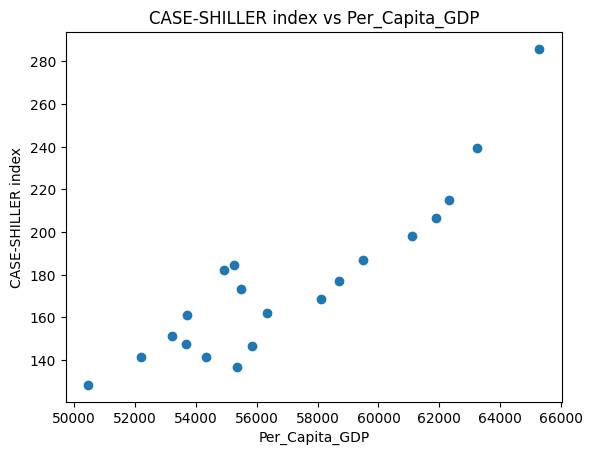

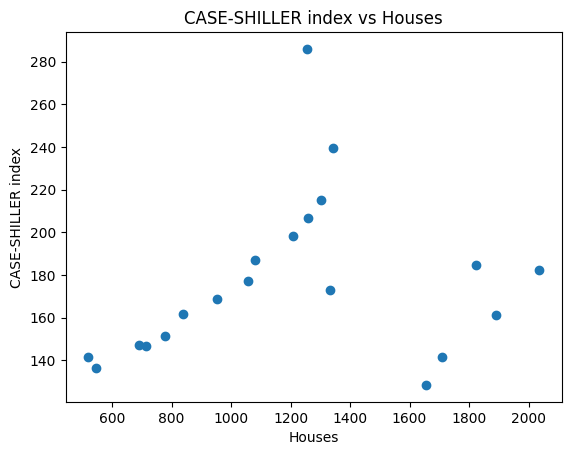

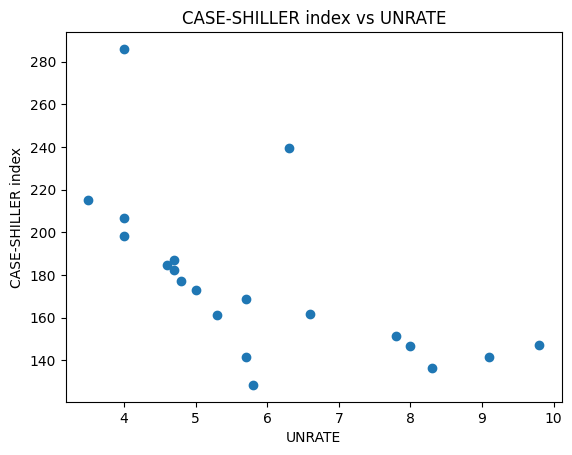

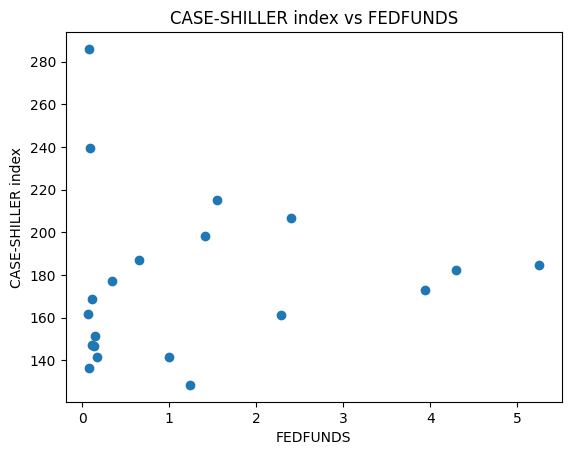

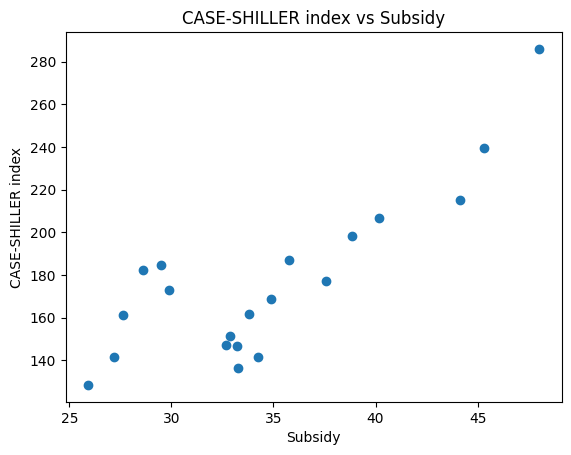

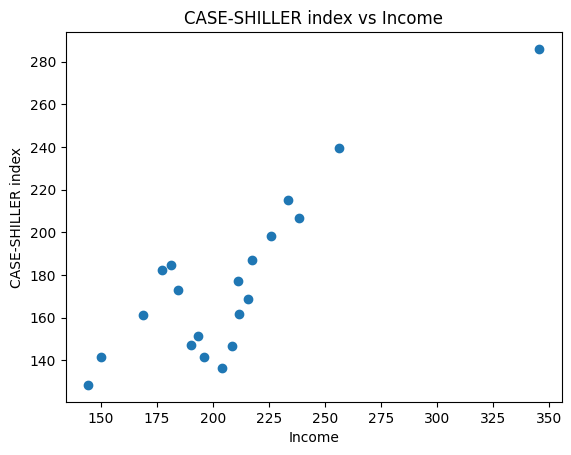

In [127]:
for feature in X.columns:
    plt.figure()
    plt.scatter(x = X[feature], y = y)
    plt.xlabel(feature)
    plt.ylabel("CASE-SHILLER index")
    plt.title(f"CASE-SHILLER index vs {feature}")

From the correlation matrix and the scatter plots, the following conclusions can be made-

Number of new houses has almost 0 correlation. This is unexpected as one would think that the number of houses supplied should also affect home prices. Maybe the number of new houses built are not enough to bring the prices down significantly.
Impact of the great recession is reflected in almost all the plots.
Interest rates have a slight negative impact on the home prices.
All the other variables are positively correlated with the home prices.

### Model Building

In [142]:
!pip install scikit-learn

  Obtaining dependency information for scikit-learn from https://files.pythonhosted.org/packages/fe/6b/db949ed5ac367987b1f250f070f340b7715d22f0c9c965bdf07de6ca75a3/scikit_learn-1.3.2-cp312-cp312-win_amd64.whl.metadata
  Obtaining dependency information for scipy>=1.5.0 from https://files.pythonhosted.org/packages/c6/a1/357e4cd43af2748e1e0407ae0e9a5ea8aaaa6b702833c81be11670dcbad8/scipy-1.11.4-cp312-cp312-win_amd64.whl.metadata
     ---------------------------------------- 0.0/60.4 kB ? eta -:--:--
     ---------------------------------------- 0.0/60.4 kB ? eta -:--:--
     ------------------- ------------------ 30.7/60.4 kB 660.6 kB/s eta 0:00:01
     -------------------------------------- 60.4/60.4 kB 796.2 kB/s eta 0:00:00
  Obtaining dependency information for joblib>=1.1.1 from https://files.pythonhosted.org/packages/10/40/d551139c85db202f1f384ba8bcf96aca2f329440a844f924c8a0040b6d02/joblib-1.3.2-py3-none-any.whl.metadata
  Obtaining dependency information for threadpoolctl>=2.0.0 fr


[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [144]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

In [145]:
# Scaling
scalar = MinMaxScaler()
X = scalar.fit_transform(X)

In [146]:
# Splitting data into train and validation sets
X_train, X_valid, y_train, y_valid = train_test_split(X,y, test_size= 0.2, random_state= 42)

In [147]:
# Linear Regression Model
model = LinearRegression()
model.fit(X_train, y_train)
pred = model.predict(X_valid)
score = r2_score(pred, y_valid)
print("The r2_score for the validation set is: ", score)

The r2_score for the validation set is:  0.960940870423439


In [148]:
#Printing the regression coefficients of different variables
coefs = model.coef_
cols = df.columns
for i in range(len(coefs)):
    print(f"The coefficient for {cols[i]} is {coefs[i]}")

The coefficient for Per_Capita_GDP is -16.155457224110624
The coefficient for Houses is 55.87671118235804
The coefficient for UNRATE is -1.5779268411429332
The coefficient for FEDFUNDS is 17.87556247473254
The coefficient for Subsidy is 81.63114430955957
The coefficient for Income is 100.1576191290912


In [151]:
# The intercept
print("The intercept is: ", model.intercept_)


The intercept is:  92.77520376023891


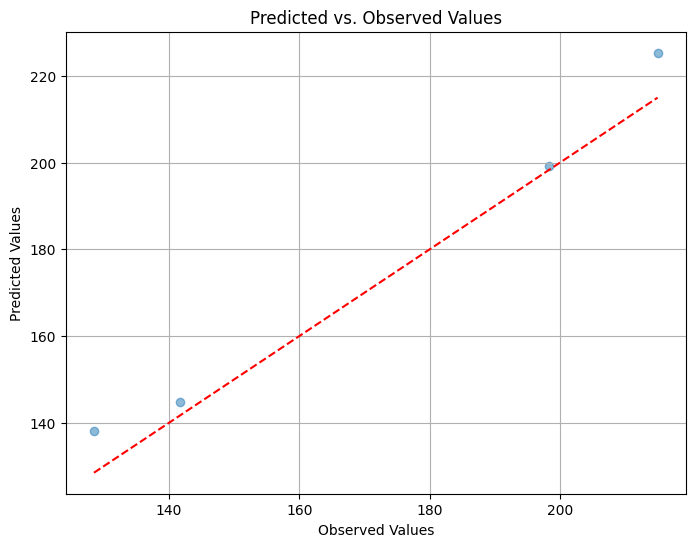

In [156]:
plt.figure(figsize=(8, 6))
plt.scatter(y_valid, pred, alpha=0.5)
plt.xlabel("Observed Values")
plt.ylabel("Predicted Values")
plt.title("Predicted vs. Observed Values")
plt.grid(True)

# Add a diagonal line for reference (perfect predictions)
x = np.linspace(min(y_valid), max(y_valid), 100)
plt.plot(x, x, color='red', linestyle='--')

***Observation*** :As most variable increase with time. So, it is expected that they will have high correlation. So, instead of depending upon the linear model, we can directly study the impact of variables on the home price index using the scatter plots.

*** A few variables that could have been studied are below. ***

- Construction Prices
- CPI 
- Number of new houses supplied
- Working Population
- Urban Population
- Percentage of population above 65
- Number of Households
- Marriage Rate 
- Land availability 
- Number of active listings

### THANKU ###